In [1]:
import numpy as np
import pandas as pd
from tesser import bic
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import itertools
import glob, os

In [2]:
data_dir ='./Data/individual_results/'

In [3]:
def get_files(data_dir):
    files = [file for file in glob.glob(f"{data_dir}*.csv")]  #returns list of paths to each model data
    return files

In [4]:
def get_k(res, name):
    list_col = list(res.columns)
    list_col.remove('subject')
    list_col.remove('log_like')
    k = len(list_col)
    if 'only'  in name:
        k = k-1
    if 'fixed'  in name:
        k = k-1
    return k

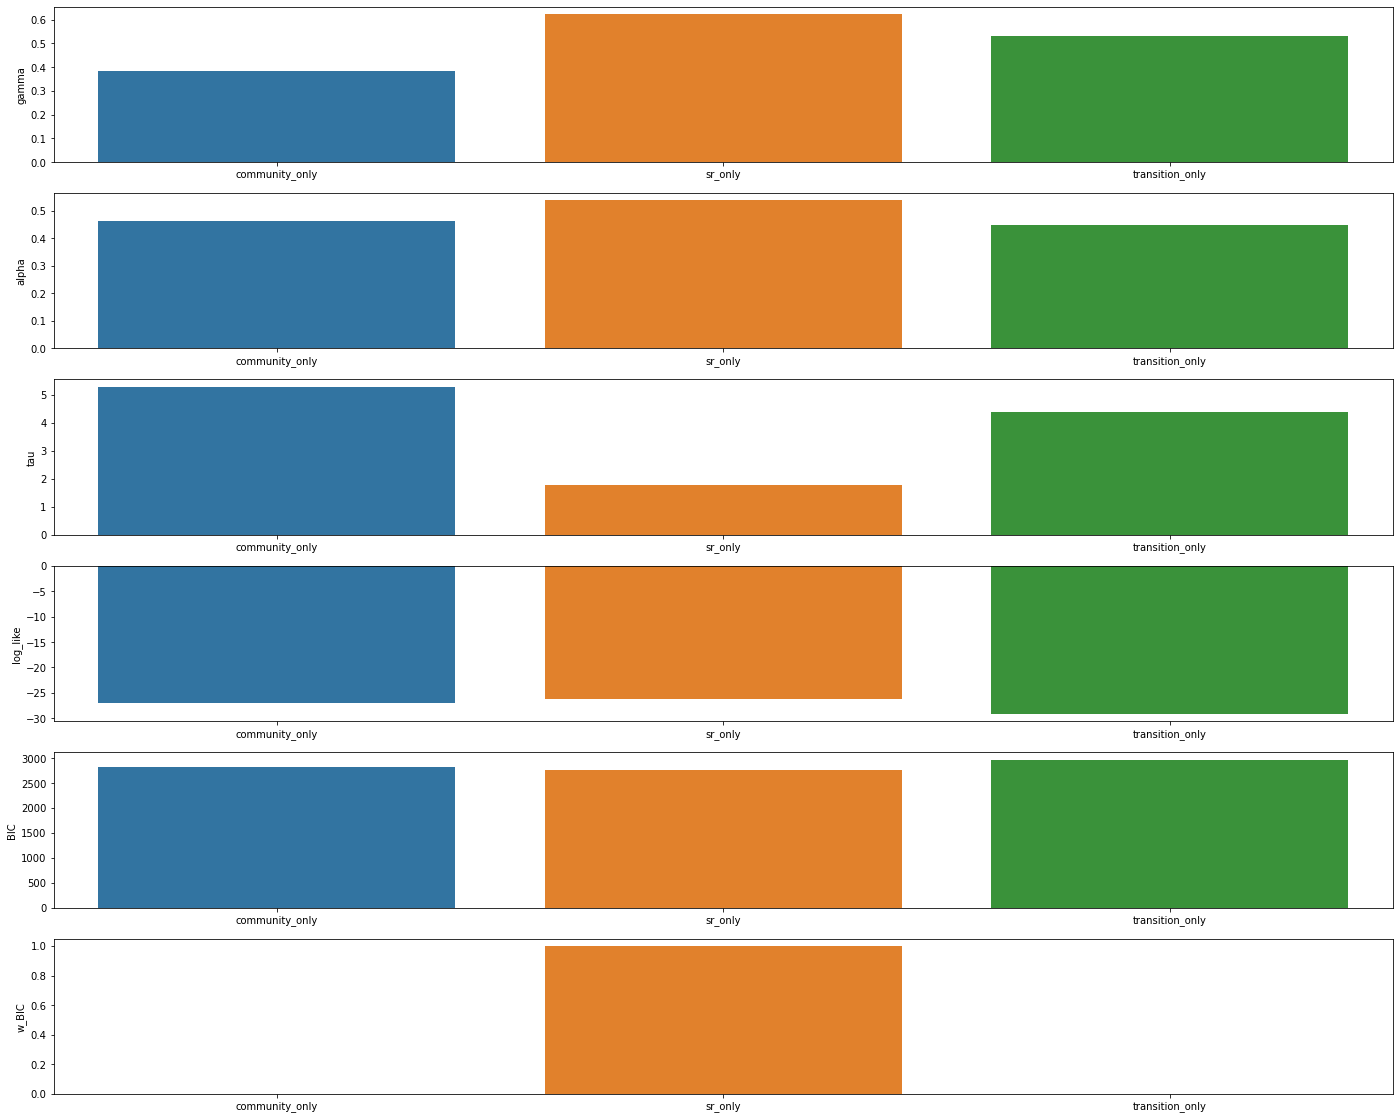

In [5]:
models = {}
files = get_files(data_dir)
for file in files:
    name = file
    name = name.replace(data_dir,"")
    name = name.replace('.csv',"")
    
    results =pd.read_csv(file) # creates DataFrame from csv file
    k = get_k(results, name) # gets number of free parametes of model
    n = 42 # number of trials in induction data

    
    model_bic = bic.get_bic(results, k , n, False) # BIC at group level    
    param_dict = bic.params(results, False)
    avgs = np.array([x for x in param_dict.values()])
    param = [x for x in param_dict.keys()]
    full = np.append(avgs,model_bic)
    models[name] = full
    
param.append( 'BIC')
df_bar =pd.DataFrame(data = models.values(),  columns = param)
df_bar['w_BIC'] = bic.wbic(df_bar.BIC, axis=0)
df_bar.index = models.keys()
names = list(df_bar.columns)
names


fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(24,20))

for ax, n in zip(axes.flatten(), names):
    sns.barplot(x=df_bar.index, y=df_bar[n], data=df_bar, ax=ax)

<AxesSubplot:xlabel='Models', ylabel='BIC'>

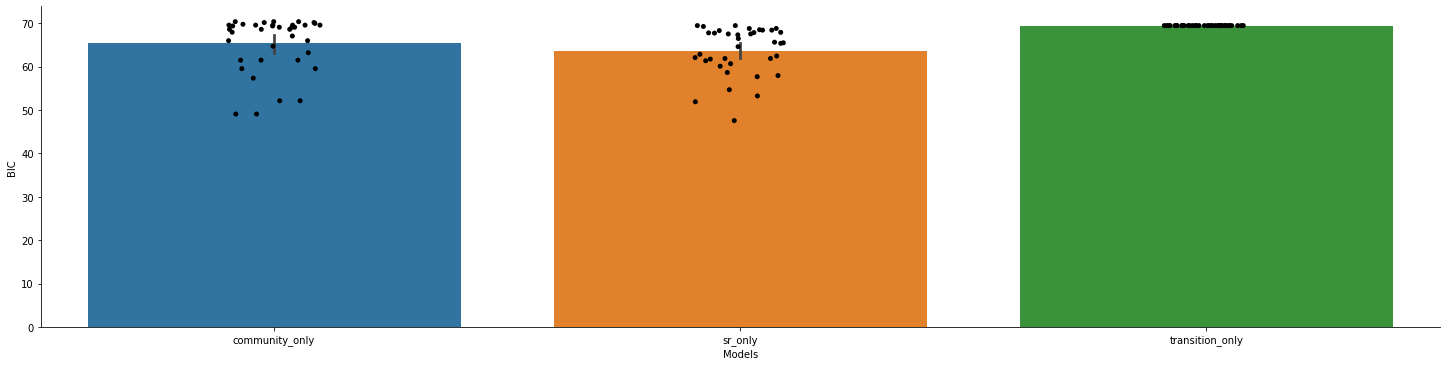

In [6]:
df_bic = pd.DataFrame(results.subject)
df_gamma = df_bic.copy()
df_alpha = df_bic.copy()
df_tau = df_bic.copy()
df_log_like = df_bic.copy()

for file in files:
    name = file
    name = name.replace(data_dir,"")
    name = name.replace('.csv',"")
    results =pd.read_csv(file) # creates DataFrame from csv file

    k = get_k(results, name) # gets number of free parametes of model
    n = 42 # number of trials in induction data

    bic_array = bic.get_bic(results, k , n, subject_BIC= True, array=True) # array of BIC per subjcet
    df_bic[name] = bic_array
    df_gamma[name] = results.gamma
    df_alpha[name] = results.alpha
    df_tau[name] = results.tau
    df_log_like[name] = results.log_like

# mod= pd.concat(df_lists, axis=0, sort=False)
# df_bic =df_bic.set_index('subject')
# df_gamma = df_gamma.set_index('subject')
# df_alpha = df_alpha.set_index('subject')
# df_tau = df_tau.set_index('subject')
# df_log_like = df_log_like.set_index('subject')
# df1.Models.astype('category').cat
dummy = df_bic.to_numpy()
dummy= dummy[:,1:]

df_wbic = df_bic.copy()
df_wbic.iloc[:,1:] = bic.wbic(dummy)
df_wbic.head()
df1 = df_bic.melt('subject', var_name='Models',  value_name='BIC')
sns.catplot(x="Models", y="BIC", data=df1, height=5, aspect=20/5, color = 'k')
sns.barplot(x="Models", y="BIC", data=df1,)

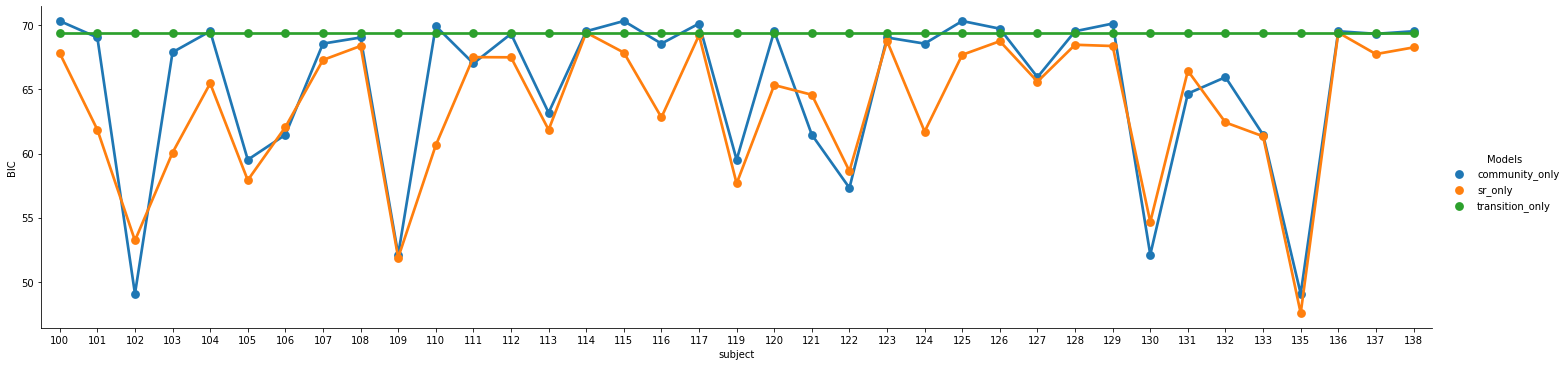

In [7]:
df1 = df_bic.melt('subject', var_name='Models',  value_name='BIC')

sns.catplot(x="subject", y="BIC", hue='Models', data=df1, kind='point', height=5, aspect=20/5)

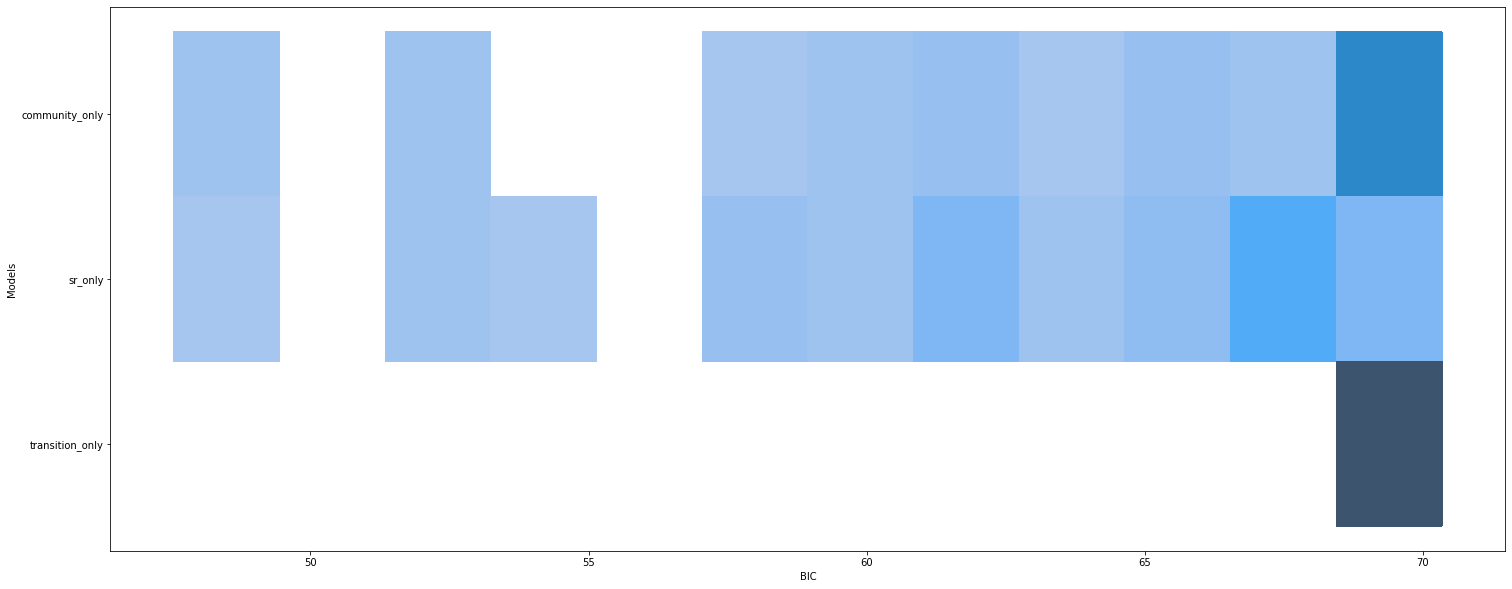

In [8]:
fig, hist = plt.subplots(figsize=(25,10))

hist = sns.histplot(x="BIC", y="Models",data=df1, kde=True, element="step")# hist.set_yticks(rotation=90)


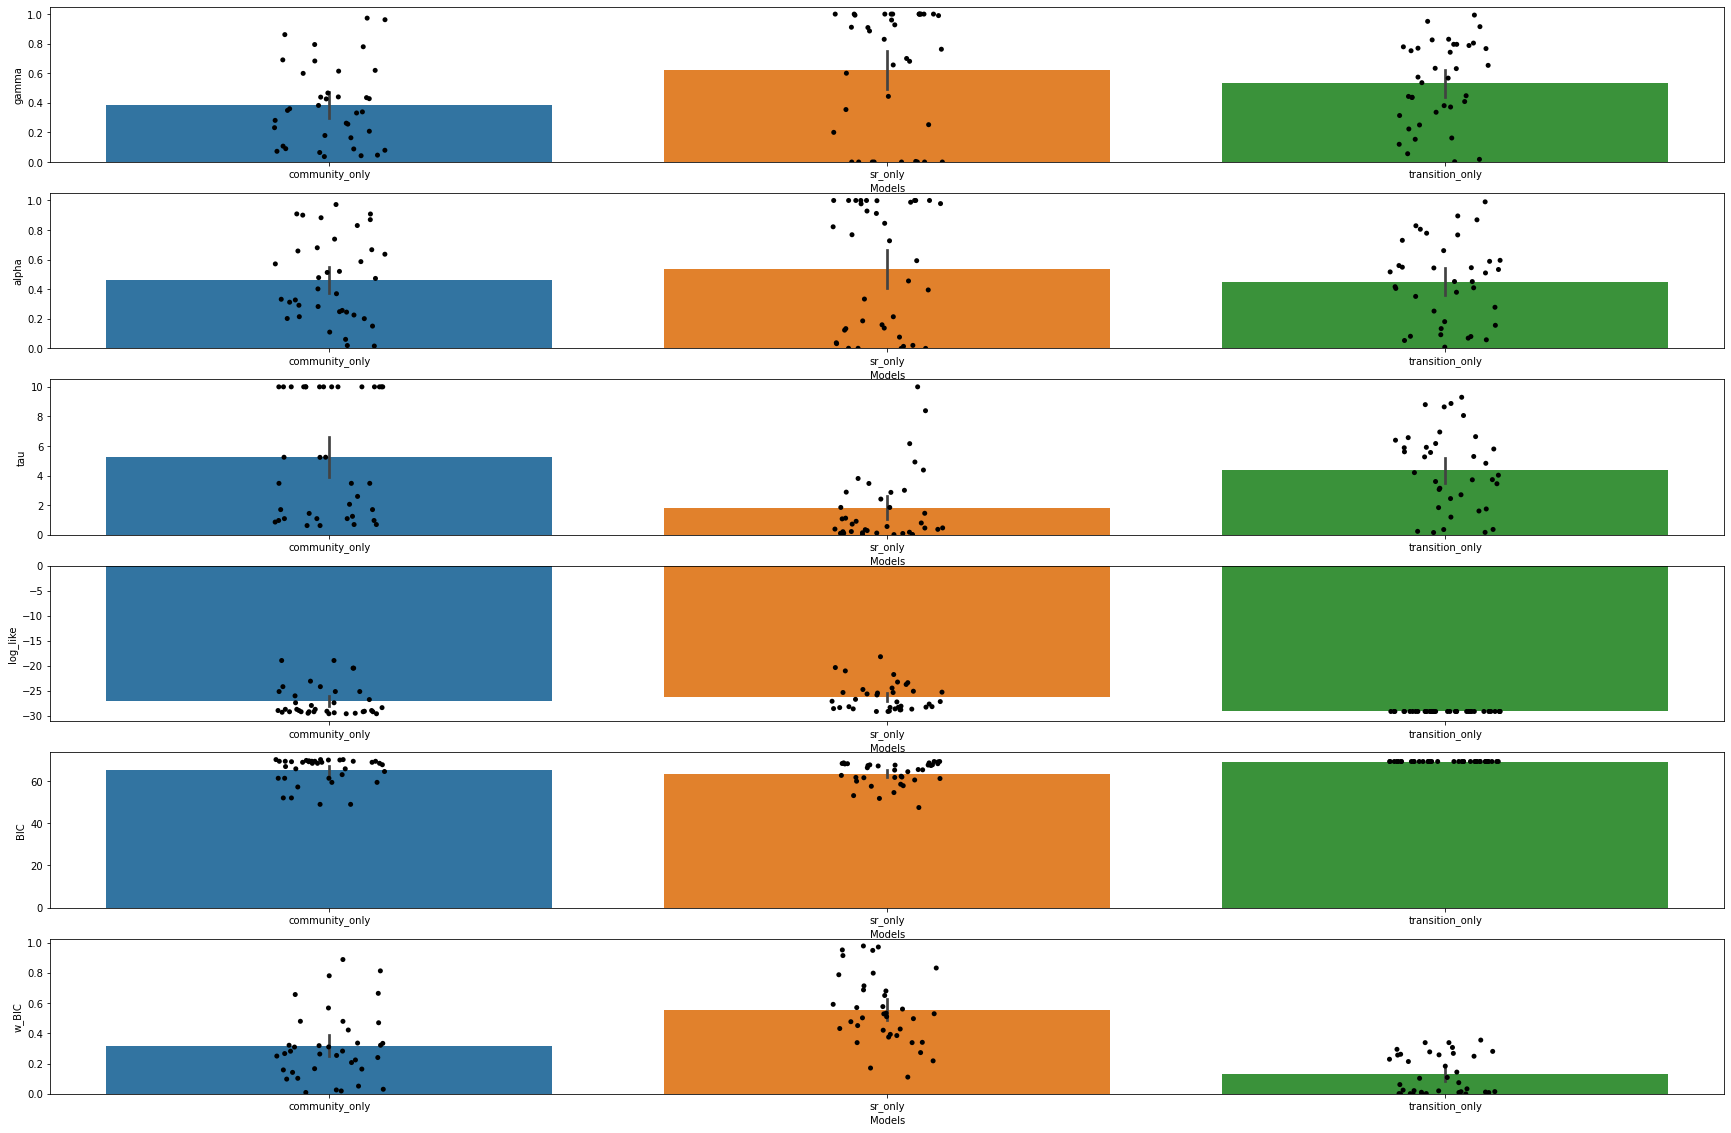

In [9]:
model_names =list(models.keys())
# print(model_names)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(30,20))
plt.gca().set_prop_cycle(None)
data = [df_gamma, df_alpha, df_tau, df_log_like, df_bic, df_wbic]
data_names =['gamma', 'alpha', 'tau', 'log_like', 'BIC', 'w_BIC']
for ax, p, n in zip(axes.flatten(), data, data_names):
    
    dff = p.melt('subject', var_name='Models',  value_name=n)
#     dff = dff[dff['Models'] == f'{n}']
#     line =sns.regplot(x="subject", y="BIC", data=dff,ax=ax,)
#     line.set_title(f'{n}')
#     line.set_xlabel('')

# plt.show()

#     sns.pointplot(x="subject", y=n , hue='Models', data=dff,join=False, ax=ax)
    sns.barplot(x="Models", y=n, data=dff,ax=ax)
    sns.stripplot(x="Models", y=n, data=dff, ax=ax, color='k')



In [10]:
sns.displot

<function seaborn.distributions.displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)>

In [11]:
data_dir ='./Data/hybrid_results/'

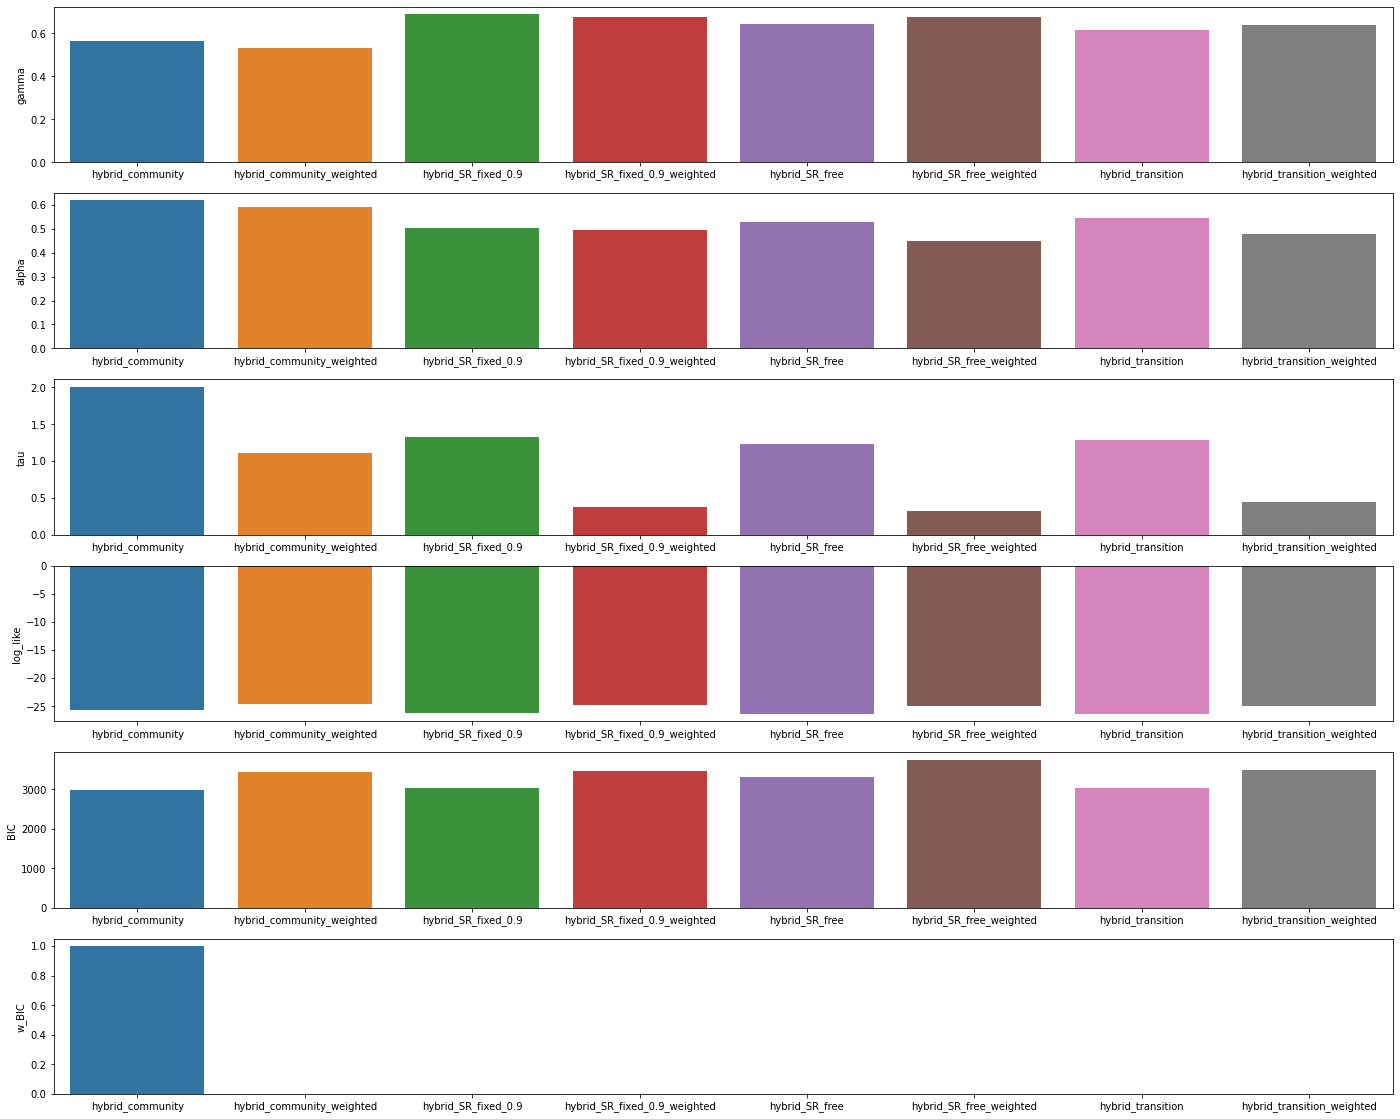

In [12]:
models = {}
files = get_files(data_dir)
for file in files:
    name = file
    name = name.replace(data_dir,"")
    name = name.replace('.csv',"")
    
    results =pd.read_csv(file) # creates DataFrame from csv file
    k = get_k(results, name) # gets number of free parametes of model
    n = 42 # number of trials in induction data

    
    model_bic = bic.get_bic(results, k , n, False) # BIC at group level    
    param_dict = bic.params(results, False)
    avgs = np.array([x for x in param_dict.values()])
    param = [x for x in param_dict.keys()]
    full = np.append(avgs,model_bic)
    models[name] = full
    
param.append( 'BIC')
df_bar =pd.DataFrame(data = models.values(),  columns = param)
df_bar['w_BIC'] = bic.wbic(df_bar.BIC, axis=0)
df_bar.index = models.keys()
names = list(df_bar.columns)
names


fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(24,20))

for ax, n in zip(axes.flatten(), names):
    sns.barplot(x=df_bar.index, y=df_bar[n], data=df_bar, ax=ax)

<AxesSubplot:xlabel='Models', ylabel='BIC'>

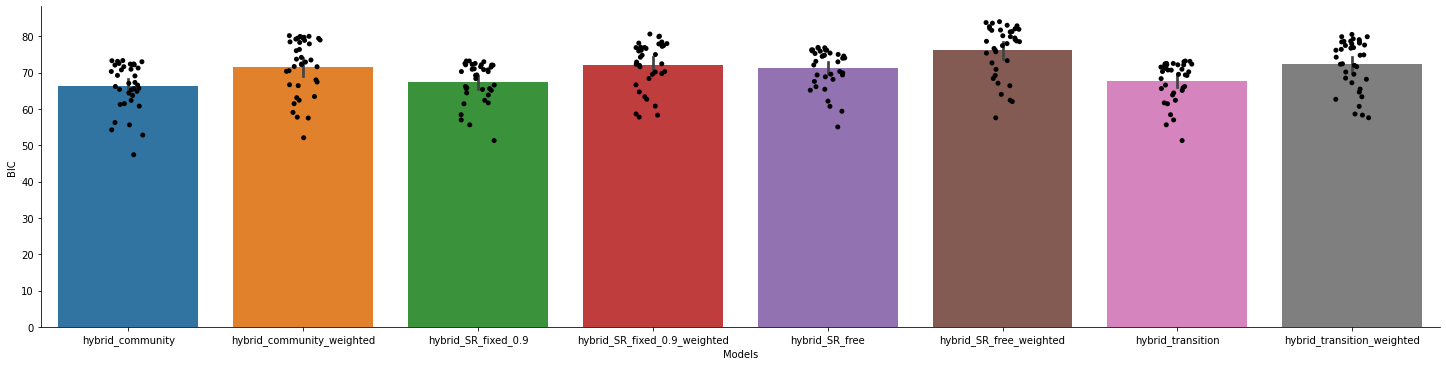

In [13]:
df_bic = pd.DataFrame(results.subject)
df_gamma = df_bic.copy()
df_alpha = df_bic.copy()
df_tau = df_bic.copy()
df_log_like = df_bic.copy()

for file in files:
    name = file
    name = name.replace(data_dir,"")
    name = name.replace('.csv',"")
    results =pd.read_csv(file) # creates DataFrame from csv file

    k = get_k(results, name) # gets number of free parametes of model
    n = 42 # number of trials in induction data

    bic_array = bic.get_bic(results, k , n, subject_BIC= True, array=True) # array of BIC per subjcet
    df_bic[name] = bic_array
    df_gamma[name] = results.gamma
    df_alpha[name] = results.alpha
    df_tau[name] = results.tau
    df_log_like[name] = results.log_like

# mod= pd.concat(df_lists, axis=0, sort=False)
# df_bic =df_bic.set_index('subject')
# df_gamma = df_gamma.set_index('subject')
# df_alpha = df_alpha.set_index('subject')
# df_tau = df_tau.set_index('subject')
# df_log_like = df_log_like.set_index('subject')
# df1.Models.astype('category').cat
dummy = df_bic.to_numpy()
dummy= dummy[:,1:]

df_wbic = df_bic.copy()
df_wbic.iloc[:,1:] = bic.wbic(dummy)
df_wbic.head()
df1 = df_bic.melt('subject', var_name='Models',  value_name='BIC')
sns.catplot(x="Models", y="BIC", data=df1, height=5, aspect=20/5, color = 'k')
sns.barplot(x="Models", y="BIC", data=df1,)

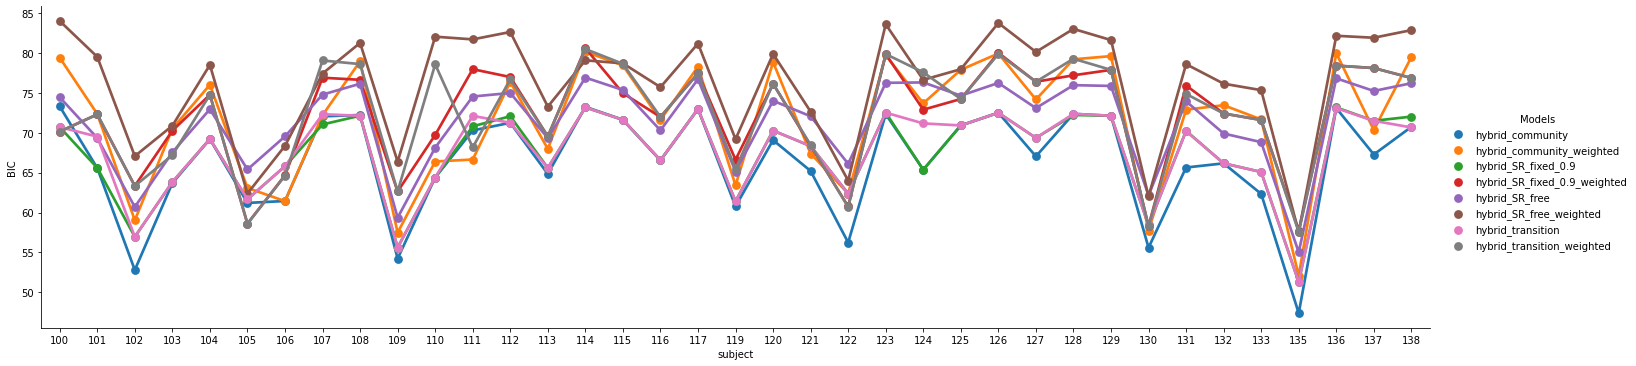

In [14]:
df1 = df_bic.melt('subject', var_name='Models',  value_name='BIC')

sns.catplot(x="subject", y="BIC", hue='Models', data=df1, kind='point', height=5, aspect=20/5)

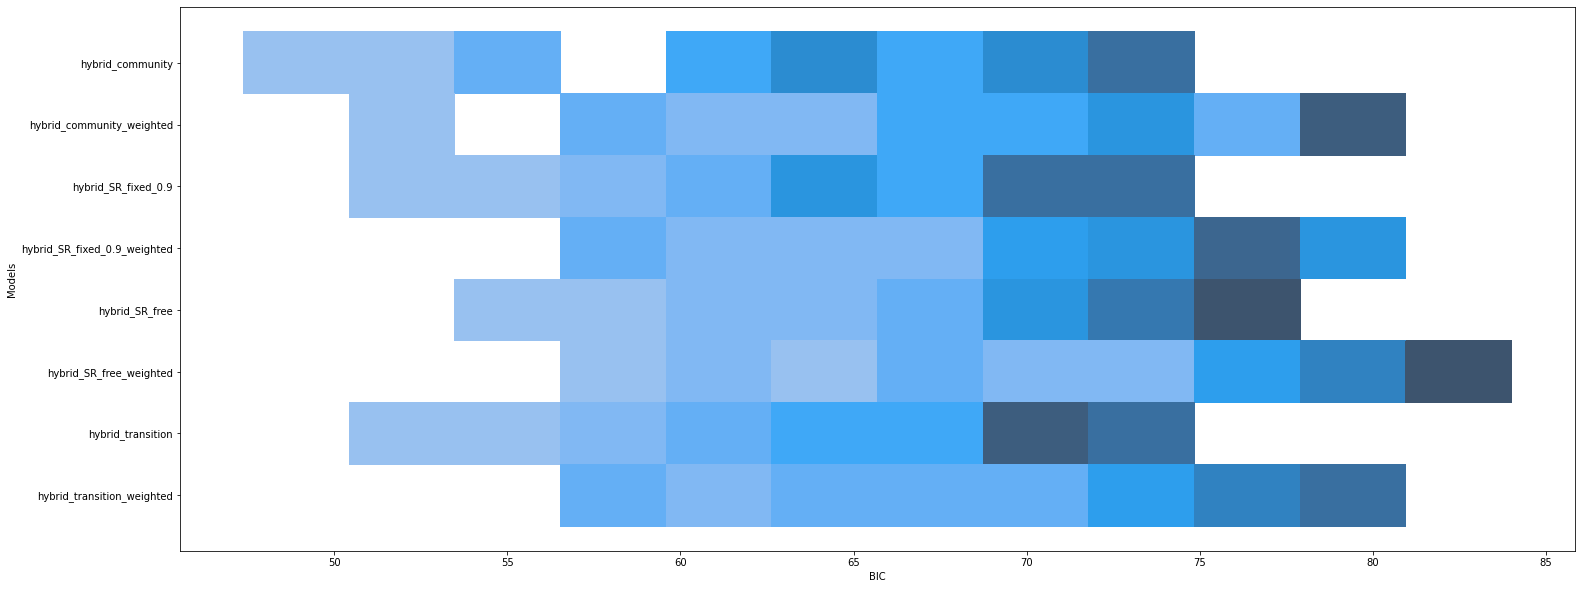

In [15]:
fig, hist = plt.subplots(figsize=(25,10))

hist = sns.histplot(x="BIC", y="Models",data=df1, kde=True, element="step")# hist.set_yticks(rotation=90)


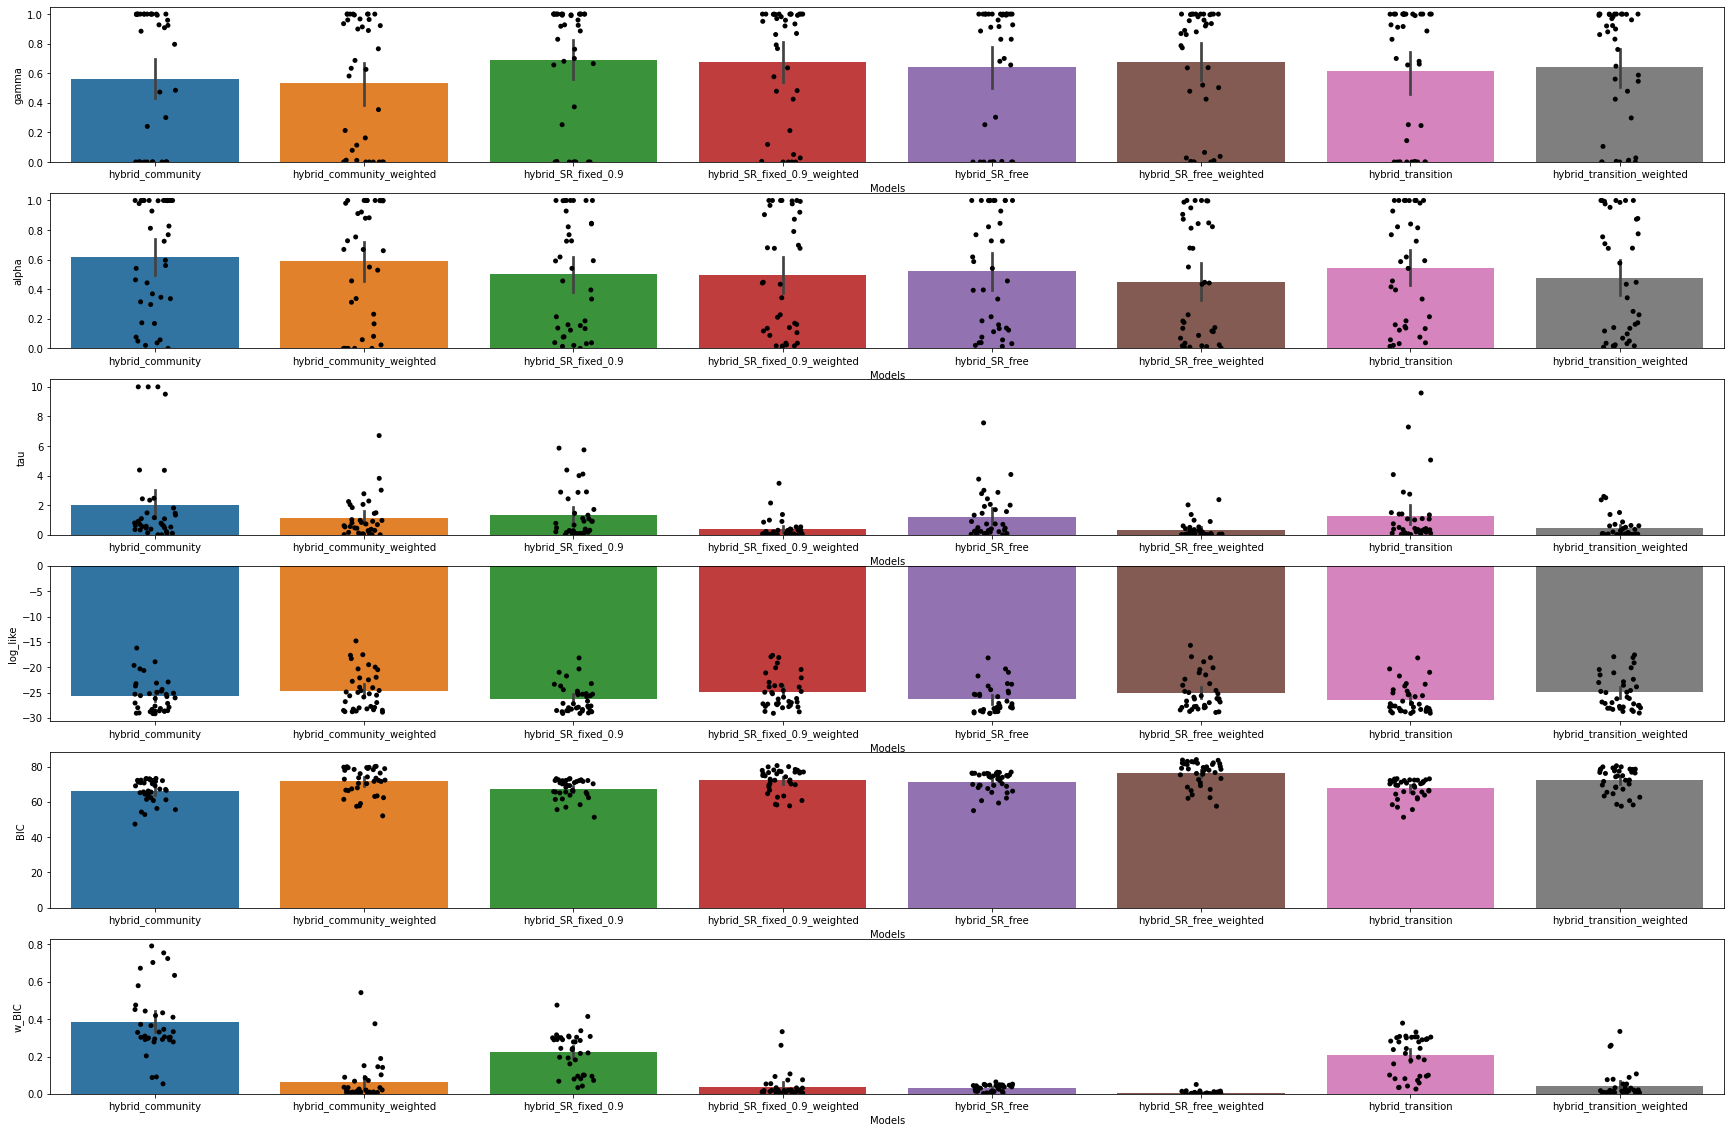

In [16]:
model_names =list(models.keys())
# print(model_names)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(30,20))
plt.gca().set_prop_cycle(None)
data = [df_gamma, df_alpha, df_tau, df_log_like, df_bic, df_wbic]
data_names =['gamma', 'alpha', 'tau', 'log_like', 'BIC', 'w_BIC']
for ax, p, n in zip(axes.flatten(), data, data_names):
    
    dff = p.melt('subject', var_name='Models',  value_name=n)
#     dff = dff[dff['Models'] == f'{n}']
#     line =sns.regplot(x="subject", y="BIC", data=dff,ax=ax,)
#     line.set_title(f'{n}')
#     line.set_xlabel('')

# plt.show()

#     sns.pointplot(x="subject", y=n , hue='Models', data=dff,join=False, ax=ax)
    sns.barplot(x="Models", y=n, data=dff,ax=ax)
    sns.stripplot(x="Models", y=n, data=dff, ax=ax, color='k')

